In [1]:
import os
import torch
import torch.nn as nn 
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.optim as optim

from baseline.utils import *
from baseline.training import training

from baseline.models.encoder import Encoder
from baseline.models.linear_classifier import LinearClassifier, TwoLayersClassifier
from baseline.models.simclr import SupCon


In [2]:
train_data, test_data = get_data()
train_unlabeled_loader, train_labeled_loader, test_loader = get_loader(train_data, test_data, batch_size=50)
device = get_device()

 <function is_available at 0x00000111EA615E50> and can be used by 1 devices
The device used is NVIDIA GeForce GTX 1050


In [3]:
encoder = Encoder()
model = SupCon(encoder, head='mlp', feat_dim=128)
PATH = './SIMCLR/batch_size_64/pre_trained_supcon_64.pth'
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [4]:
for name, param in model.named_parameters():
    param.requires_grad = False

In [5]:
for name, param in model.named_parameters():print(name, param.requires_grad)

encoder.layer1.0.weight False
encoder.layer1.0.bias False
encoder.layer1.1.weight False
encoder.layer1.1.bias False
encoder.layer2.0.weight False
encoder.layer2.0.bias False
encoder.layer2.1.weight False
encoder.layer2.1.bias False
encoder.layer3.0.weight False
encoder.layer3.0.bias False
encoder.layer3.1.weight False
encoder.layer3.1.bias False
head.0.weight False
head.0.bias False
head.2.weight False
head.2.bias False


In [6]:
classifier = LinearClassifier()
#classifier = TwoLayersClassifier()
model.head = classifier

In [7]:
output_fn = torch.nn.Softmax(dim=1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-3)

In [8]:
epochs = 25
train_class = training(train_loader=train_labeled_loader, val_loader=test_loader, metric=get_accuracy, device=device)
train_class.train(model=model, epochs=epochs, optimizer=optimizer, criterion=criterion, output_fn=output_fn, RGB = False, patience_LR = 3, patience_earlystop = 5)

  4%|▍         | 1/25 [00:18<07:19, 18.30s/it]

| Epoch: 1/25 | Train: Loss 2.0855 Accuracy : 0.3300 | Val: Loss 2.1282 Accuracy : 0.2837



  8%|▊         | 2/25 [00:23<04:04, 10.62s/it]

| Epoch: 2/25 | Train: Loss 1.8919 Accuracy : 0.7000 | Val: Loss 1.9665 Accuracy : 0.5865



 12%|█▏        | 3/25 [00:29<03:05,  8.44s/it]

| Epoch: 3/25 | Train: Loss 1.7509 Accuracy : 0.8800 | Val: Loss 1.8468 Accuracy : 0.7181



 16%|█▌        | 4/25 [00:34<02:29,  7.11s/it]

| Epoch: 4/25 | Train: Loss 1.6672 Accuracy : 0.9500 | Val: Loss 1.7764 Accuracy : 0.7895



 20%|██        | 5/25 [00:39<02:06,  6.30s/it]

| Epoch: 5/25 | Train: Loss 1.6422 Accuracy : 0.9700 | Val: Loss 1.7550 Accuracy : 0.8290



 24%|██▍       | 6/25 [00:44<01:51,  5.86s/it]

| Epoch: 6/25 | Train: Loss 1.6200 Accuracy : 0.9700 | Val: Loss 1.7340 Accuracy : 0.8505



 28%|██▊       | 7/25 [00:51<01:50,  6.14s/it]

| Epoch: 7/25 | Train: Loss 1.5886 Accuracy : 0.9700 | Val: Loss 1.7040 Accuracy : 0.8640



 32%|███▏      | 8/25 [00:55<01:36,  5.69s/it]

| Epoch: 8/25 | Train: Loss 1.5627 Accuracy : 1.0000 | Val: Loss 1.6801 Accuracy : 0.8804



 36%|███▌      | 9/25 [01:00<01:26,  5.42s/it]

| Epoch: 9/25 | Train: Loss 1.5474 Accuracy : 1.0000 | Val: Loss 1.6677 Accuracy : 0.8912



 40%|████      | 10/25 [01:05<01:18,  5.26s/it]

| Epoch: 10/25 | Train: Loss 1.5352 Accuracy : 1.0000 | Val: Loss 1.6587 Accuracy : 0.8984



 44%|████▍     | 11/25 [01:10<01:11,  5.12s/it]

| Epoch: 11/25 | Train: Loss 1.5238 Accuracy : 1.0000 | Val: Loss 1.6499 Accuracy : 0.9028



 48%|████▊     | 12/25 [01:14<01:04,  4.98s/it]

| Epoch: 12/25 | Train: Loss 1.5155 Accuracy : 1.0000 | Val: Loss 1.6437 Accuracy : 0.9052



 52%|█████▏    | 13/25 [01:19<00:58,  4.87s/it]

| Epoch: 13/25 | Train: Loss 1.5101 Accuracy : 1.0000 | Val: Loss 1.6407 Accuracy : 0.9061



 56%|█████▌    | 14/25 [01:24<00:52,  4.80s/it]

| Epoch: 14/25 | Train: Loss 1.5051 Accuracy : 1.0000 | Val: Loss 1.6382 Accuracy : 0.9077



 60%|██████    | 15/25 [01:28<00:47,  4.75s/it]

| Epoch: 15/25 | Train: Loss 1.4985 Accuracy : 1.0000 | Val: Loss 1.6338 Accuracy : 0.9092



 64%|██████▍   | 16/25 [01:34<00:43,  4.87s/it]

| Epoch: 16/25 | Train: Loss 1.4916 Accuracy : 1.0000 | Val: Loss 1.6291 Accuracy : 0.9109



 68%|██████▊   | 17/25 [01:39<00:39,  4.91s/it]

| Epoch: 17/25 | Train: Loss 1.4859 Accuracy : 1.0000 | Val: Loss 1.6259 Accuracy : 0.9113



 72%|███████▏  | 18/25 [01:43<00:34,  4.89s/it]

| Epoch: 18/25 | Train: Loss 1.4801 Accuracy : 1.0000 | Val: Loss 1.6228 Accuracy : 0.9130



 76%|███████▌  | 19/25 [01:48<00:28,  4.83s/it]

| Epoch: 19/25 | Train: Loss 1.4741 Accuracy : 1.0000 | Val: Loss 1.6197 Accuracy : 0.9132



 80%|████████  | 20/25 [01:53<00:23,  4.77s/it]

| Epoch: 20/25 | Train: Loss 1.4696 Accuracy : 1.0000 | Val: Loss 1.6181 Accuracy : 0.9129



 84%|████████▍ | 21/25 [01:58<00:19,  4.84s/it]

| Epoch: 21/25 | Train: Loss 1.4663 Accuracy : 1.0000 | Val: Loss 1.6174 Accuracy : 0.9124



 88%|████████▊ | 22/25 [02:04<00:16,  5.36s/it]

| Epoch: 22/25 | Train: Loss 1.4641 Accuracy : 1.0000 | Val: Loss 1.6176 Accuracy : 0.9115



 92%|█████████▏| 23/25 [02:09<00:10,  5.33s/it]

| Epoch: 23/25 | Train: Loss 1.4623 Accuracy : 1.0000 | Val: Loss 1.6172 Accuracy : 0.9116



 96%|█████████▌| 24/25 [02:15<00:05,  5.32s/it]

| Epoch: 24/25 | Train: Loss 1.4594 Accuracy : 1.0000 | Val: Loss 1.6155 Accuracy : 0.9126



100%|██████████| 25/25 [02:20<00:00,  5.62s/it]

| Epoch: 25/25 | Train: Loss 1.4562 Accuracy : 1.0000 | Val: Loss 1.6133 Accuracy : 0.9128



In [9]:
train_class.loss_valid[epochs-1]

1.6133213353157043

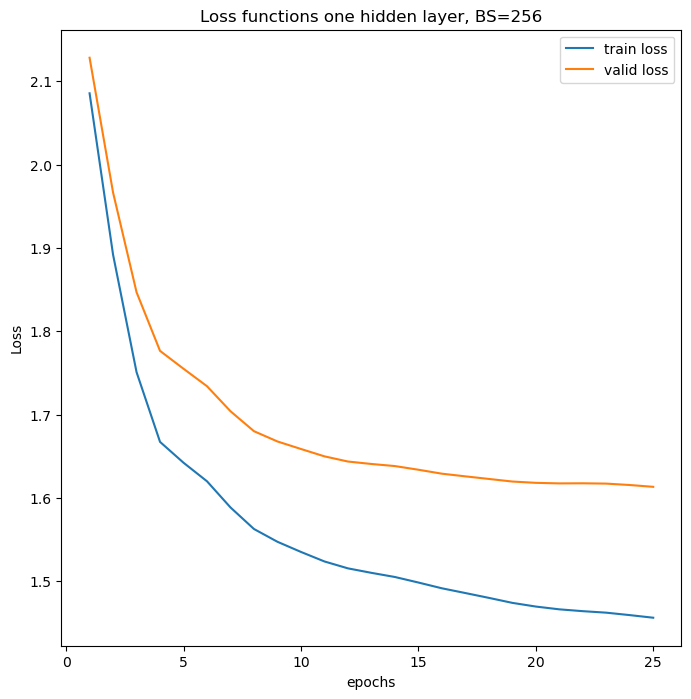

In [10]:
plt.figure(figsize=(8,8))

plt.plot(range(1,epochs + 1), train_class.loss_train, label="train loss" )
plt.plot(range(1, epochs +1), train_class.loss_valid, label="valid loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss functions one hidden layer, BS=64")
plt.legend()

plt.savefig("Loss function OWL BS=64.png")
plt.show()

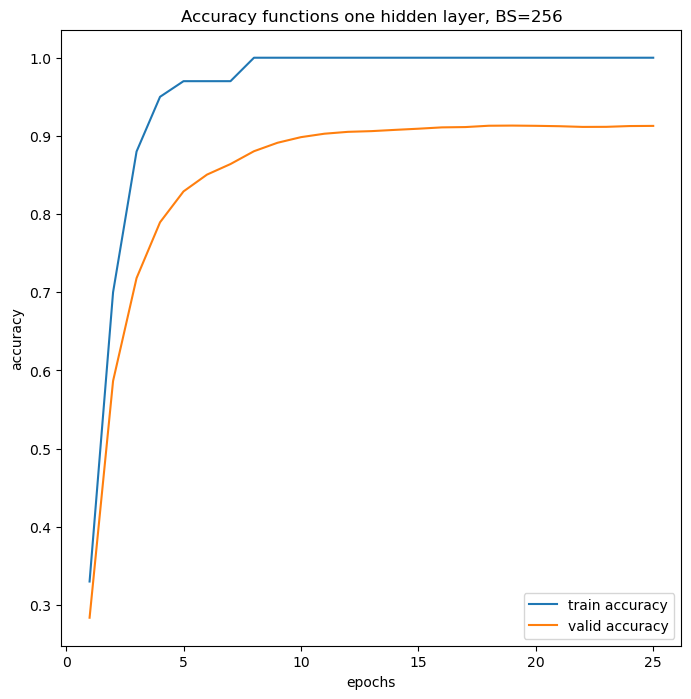

In [11]:
plt.figure(figsize=(8,8))

plt.plot(range(1,epochs + 1), train_class.acc_train, label="train accuracy" )
plt.plot(range(1, epochs +1), train_class.acc_valid, label="valid accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy functions one hidden layer, BS=64")
plt.legend()

plt.savefig("Accuracy function OWL BS=64.png")

In [12]:

accuracy_list = [train_class.acc_valid[epochs-1]]
for k in range(2):
    encoder = Encoder()
    model = SupCon(encoder, head='mlp', feat_dim=128)
    PATH = './SIMCLR/batch_size_64/pre_trained_supcon_64.pth'
    model.load_state_dict(torch.load(PATH))
    for name, param in model.named_parameters():
        param.requires_grad = False
    classifier = LinearClassifier()
    #classifier = TwoLayersClassifier()
    model.head = classifier
    output_fn = torch.nn.Softmax(dim=1)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.999), eps=1e-08, weight_decay=1e-3)
    epochs = 25
    train_class = training(train_loader=train_labeled_loader, val_loader=test_loader, metric=get_accuracy, device=device)
    train_class.train(model=model, epochs=epochs, optimizer=optimizer, criterion=criterion, output_fn=output_fn, RGB = False, patience_LR = 3, patience_earlystop = 5)
    accuracy_list.append(train_class.acc_valid[epochs-1])
    

  4%|▍         | 1/25 [00:05<02:21,  5.91s/it]

| Epoch: 1/25 | Train: Loss 2.0613 Accuracy : 0.2900 | Val: Loss 2.0969 Accuracy : 0.2980



  8%|▊         | 2/25 [00:10<02:04,  5.41s/it]

| Epoch: 2/25 | Train: Loss 1.8631 Accuracy : 0.7600 | Val: Loss 1.9378 Accuracy : 0.6416



 12%|█▏        | 3/25 [00:15<01:51,  5.07s/it]

| Epoch: 3/25 | Train: Loss 1.7250 Accuracy : 0.9200 | Val: Loss 1.8286 Accuracy : 0.7483



 16%|█▌        | 4/25 [00:20<01:43,  4.93s/it]

| Epoch: 4/25 | Train: Loss 1.6463 Accuracy : 0.9800 | Val: Loss 1.7595 Accuracy : 0.8187



 20%|██        | 5/25 [00:25<01:36,  4.84s/it]

| Epoch: 5/25 | Train: Loss 1.6194 Accuracy : 0.9900 | Val: Loss 1.7338 Accuracy : 0.8533



 24%|██▍       | 6/25 [00:29<01:31,  4.83s/it]

| Epoch: 6/25 | Train: Loss 1.5952 Accuracy : 1.0000 | Val: Loss 1.7127 Accuracy : 0.8626



 28%|██▊       | 7/25 [00:34<01:25,  4.74s/it]

| Epoch: 7/25 | Train: Loss 1.5666 Accuracy : 1.0000 | Val: Loss 1.6880 Accuracy : 0.8759



 32%|███▏      | 8/25 [00:40<01:25,  5.05s/it]

| Epoch: 8/25 | Train: Loss 1.5449 Accuracy : 1.0000 | Val: Loss 1.6699 Accuracy : 0.8886



 36%|███▌      | 9/25 [00:45<01:20,  5.04s/it]

| Epoch: 9/25 | Train: Loss 1.5331 Accuracy : 1.0000 | Val: Loss 1.6607 Accuracy : 0.8961



 40%|████      | 10/25 [00:50<01:15,  5.03s/it]

| Epoch: 10/25 | Train: Loss 1.5239 Accuracy : 1.0000 | Val: Loss 1.6530 Accuracy : 0.9006



 44%|████▍     | 11/25 [00:55<01:11,  5.09s/it]

| Epoch: 11/25 | Train: Loss 1.5147 Accuracy : 1.0000 | Val: Loss 1.6456 Accuracy : 0.9023



 48%|████▊     | 12/25 [01:00<01:06,  5.11s/it]

| Epoch: 12/25 | Train: Loss 1.5066 Accuracy : 1.0000 | Val: Loss 1.6392 Accuracy : 0.9067



 52%|█████▏    | 13/25 [01:05<01:02,  5.17s/it]

| Epoch: 13/25 | Train: Loss 1.5013 Accuracy : 1.0000 | Val: Loss 1.6357 Accuracy : 0.9093



 56%|█████▌    | 14/25 [01:11<00:57,  5.26s/it]

| Epoch: 14/25 | Train: Loss 1.4968 Accuracy : 1.0000 | Val: Loss 1.6333 Accuracy : 0.9095



 60%|██████    | 15/25 [01:16<00:53,  5.31s/it]

| Epoch: 15/25 | Train: Loss 1.4896 Accuracy : 1.0000 | Val: Loss 1.6283 Accuracy : 0.9101



 64%|██████▍   | 16/25 [01:22<00:48,  5.35s/it]

| Epoch: 16/25 | Train: Loss 1.4813 Accuracy : 1.0000 | Val: Loss 1.6224 Accuracy : 0.9095



 68%|██████▊   | 17/25 [01:28<00:45,  5.68s/it]

| Epoch: 17/25 | Train: Loss 1.4753 Accuracy : 1.0000 | Val: Loss 1.6197 Accuracy : 0.9101



 72%|███████▏  | 18/25 [01:34<00:39,  5.67s/it]

| Epoch: 18/25 | Train: Loss 1.4720 Accuracy : 1.0000 | Val: Loss 1.6195 Accuracy : 0.9107



 76%|███████▌  | 19/25 [01:39<00:33,  5.60s/it]

| Epoch: 19/25 | Train: Loss 1.4680 Accuracy : 1.0000 | Val: Loss 1.6176 Accuracy : 0.9119



 80%|████████  | 20/25 [01:45<00:27,  5.58s/it]

| Epoch: 20/25 | Train: Loss 1.4646 Accuracy : 1.0000 | Val: Loss 1.6146 Accuracy : 0.9128



 84%|████████▍ | 21/25 [01:50<00:22,  5.52s/it]

| Epoch: 21/25 | Train: Loss 1.4639 Accuracy : 1.0000 | Val: Loss 1.6142 Accuracy : 0.9118



 88%|████████▊ | 22/25 [01:55<00:16,  5.39s/it]

| Epoch: 22/25 | Train: Loss 1.4631 Accuracy : 1.0000 | Val: Loss 1.6140 Accuracy : 0.9124



 92%|█████████▏| 23/25 [02:00<00:10,  5.20s/it]

| Epoch: 23/25 | Train: Loss 1.4608 Accuracy : 1.0000 | Val: Loss 1.6133 Accuracy : 0.9140



 96%|█████████▌| 24/25 [02:05<00:05,  5.01s/it]

| Epoch: 24/25 | Train: Loss 1.4571 Accuracy : 1.0000 | Val: Loss 1.6122 Accuracy : 0.9144



100%|██████████| 25/25 [02:10<00:00,  5.21s/it]


| Epoch: 25/25 | Train: Loss 1.4528 Accuracy : 1.0000 | Val: Loss 1.6103 Accuracy : 0.9135



  4%|▍         | 1/25 [00:06<02:46,  6.95s/it]

| Epoch: 1/25 | Train: Loss 2.1378 Accuracy : 0.2000 | Val: Loss 2.1594 Accuracy : 0.2489



  8%|▊         | 2/25 [00:12<02:27,  6.41s/it]

| Epoch: 2/25 | Train: Loss 1.9314 Accuracy : 0.7300 | Val: Loss 1.9916 Accuracy : 0.5970



 12%|█▏        | 3/25 [00:19<02:17,  6.24s/it]

| Epoch: 3/25 | Train: Loss 1.7516 Accuracy : 0.9000 | Val: Loss 1.8426 Accuracy : 0.7527



 16%|█▌        | 4/25 [00:24<02:07,  6.09s/it]

| Epoch: 4/25 | Train: Loss 1.6711 Accuracy : 0.9400 | Val: Loss 1.7706 Accuracy : 0.8146



 20%|██        | 5/25 [00:31<02:05,  6.28s/it]

| Epoch: 5/25 | Train: Loss 1.6469 Accuracy : 0.9500 | Val: Loss 1.7495 Accuracy : 0.8510



 24%|██▍       | 6/25 [00:38<02:03,  6.48s/it]

| Epoch: 6/25 | Train: Loss 1.6151 Accuracy : 0.9600 | Val: Loss 1.7214 Accuracy : 0.8682



 28%|██▊       | 7/25 [00:45<01:57,  6.54s/it]

| Epoch: 7/25 | Train: Loss 1.5887 Accuracy : 0.9600 | Val: Loss 1.6981 Accuracy : 0.8736



 32%|███▏      | 8/25 [00:51<01:51,  6.55s/it]

| Epoch: 8/25 | Train: Loss 1.5736 Accuracy : 0.9700 | Val: Loss 1.6865 Accuracy : 0.8798



 36%|███▌      | 9/25 [00:58<01:44,  6.52s/it]

| Epoch: 9/25 | Train: Loss 1.5599 Accuracy : 0.9800 | Val: Loss 1.6768 Accuracy : 0.8912



 40%|████      | 10/25 [01:04<01:35,  6.39s/it]

| Epoch: 10/25 | Train: Loss 1.5435 Accuracy : 0.9800 | Val: Loss 1.6647 Accuracy : 0.8993



 44%|████▍     | 11/25 [01:10<01:27,  6.28s/it]

| Epoch: 11/25 | Train: Loss 1.5285 Accuracy : 1.0000 | Val: Loss 1.6532 Accuracy : 0.9043



 48%|████▊     | 12/25 [01:16<01:20,  6.19s/it]

| Epoch: 12/25 | Train: Loss 1.5198 Accuracy : 1.0000 | Val: Loss 1.6476 Accuracy : 0.9075



 52%|█████▏    | 13/25 [01:22<01:13,  6.16s/it]

| Epoch: 13/25 | Train: Loss 1.5138 Accuracy : 1.0000 | Val: Loss 1.6445 Accuracy : 0.9094



 56%|█████▌    | 14/25 [01:28<01:07,  6.12s/it]

| Epoch: 14/25 | Train: Loss 1.5061 Accuracy : 1.0000 | Val: Loss 1.6401 Accuracy : 0.9100



 60%|██████    | 15/25 [01:34<01:00,  6.08s/it]

| Epoch: 15/25 | Train: Loss 1.4971 Accuracy : 1.0000 | Val: Loss 1.6339 Accuracy : 0.9094



 64%|██████▍   | 16/25 [01:40<00:54,  6.04s/it]

| Epoch: 16/25 | Train: Loss 1.4901 Accuracy : 1.0000 | Val: Loss 1.6294 Accuracy : 0.9092



 68%|██████▊   | 17/25 [01:46<00:48,  6.03s/it]

| Epoch: 17/25 | Train: Loss 1.4844 Accuracy : 1.0000 | Val: Loss 1.6260 Accuracy : 0.9104



 72%|███████▏  | 18/25 [01:52<00:42,  6.10s/it]

| Epoch: 18/25 | Train: Loss 1.4790 Accuracy : 1.0000 | Val: Loss 1.6225 Accuracy : 0.9145



 76%|███████▌  | 19/25 [01:58<00:35,  5.96s/it]

| Epoch: 19/25 | Train: Loss 1.4744 Accuracy : 1.0000 | Val: Loss 1.6197 Accuracy : 0.9153



 80%|████████  | 20/25 [02:03<00:29,  5.88s/it]

| Epoch: 20/25 | Train: Loss 1.4707 Accuracy : 1.0000 | Val: Loss 1.6181 Accuracy : 0.9161



 84%|████████▍ | 21/25 [02:10<00:24,  6.01s/it]

| Epoch: 21/25 | Train: Loss 1.4674 Accuracy : 1.0000 | Val: Loss 1.6172 Accuracy : 0.9172



 88%|████████▊ | 22/25 [02:17<00:19,  6.35s/it]

| Epoch: 22/25 | Train: Loss 1.4642 Accuracy : 1.0000 | Val: Loss 1.6163 Accuracy : 0.9161



 92%|█████████▏| 23/25 [02:23<00:12,  6.23s/it]

| Epoch: 23/25 | Train: Loss 1.4611 Accuracy : 1.0000 | Val: Loss 1.6154 Accuracy : 0.9124



 96%|█████████▌| 24/25 [02:28<00:06,  6.06s/it]

| Epoch: 24/25 | Train: Loss 1.4581 Accuracy : 1.0000 | Val: Loss 1.6147 Accuracy : 0.9119



100%|██████████| 25/25 [02:35<00:00,  6.22s/it]

| Epoch: 25/25 | Train: Loss 1.4552 Accuracy : 1.0000 | Val: Loss 1.6130 Accuracy : 0.9126



In [13]:
print(f"the mean is {np.mean(accuracy_list)}")
print(f"the std is {np.std(accuracy_list)}")

the mean is 0.9129666666666666
the std is 0.0003858612300930162
